### **PRODUCT DEMAND PREDICTION**

Problem Definition:

The problem is to develop a machine learning model that can predict product
demand based on historical sales data and external factors.

This model will help businesses optimize their inventory management and production planning to meet customer needs efficiently.

The project will involve data collection, data preprocessing, feature engineering, model selection, training, and evaluation.


IMPORTING LIBRARIES

In [58]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

DATA COLLECTION

In [59]:
# Data Collection
# Assuming your dataset is named 'product_demand_data.csv' and located in the same directory as your Python script
data = pd.read_csv('/content/PoductDemand.csv')

DATA PREPROCESSING

In [60]:
# Data Preprocessing
# Handling Missing Values (if any)
data.fillna(0, inplace=True)

In [61]:
data.isnull().sum()

ID             0
Store ID       0
Total Price    0
Base Price     0
Units Sold     0
dtype: int64

SPLIT DATA

In [62]:
# Data Transformation
# No categorical variables to encode in this case

# Split Data
X = data[features]  # Features
y = data[target]  # Target variable
# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Data Standardization (optional, but often necessary for many machine learning algorithms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Encode categorical data

In [63]:
import numpy as np
import pandas as pd

# One-hot encode the categorical data
encoded_df = pd.get_dummies(data)

# Print the encoded DataFrame
print(encoded_df)


            ID  Store ID  Total Price  Base Price  Units Sold
0            1      8091      99.0375    111.8625          20
1            2      8091      99.0375     99.0375          28
2            3      8091     133.9500    133.9500          19
3            4      8091     133.9500    133.9500          44
4            5      8091     141.0750    141.0750          52
...        ...       ...          ...         ...         ...
150145  212638      9984     235.8375    235.8375          38
150146  212639      9984     235.8375    235.8375          30
150147  212642      9984     357.6750    483.7875          31
150148  212643      9984     141.7875    191.6625          12
150149  212644      9984     234.4125    234.4125          15

[150150 rows x 5 columns]


FEATURE SELECTION

In [64]:
# Feature Selection
features = ['ID', 'Store ID', 'Total Price', 'Base Price']  # Features
target = 'Units Sold'  # Target variable

 Histograms and Box Plots:

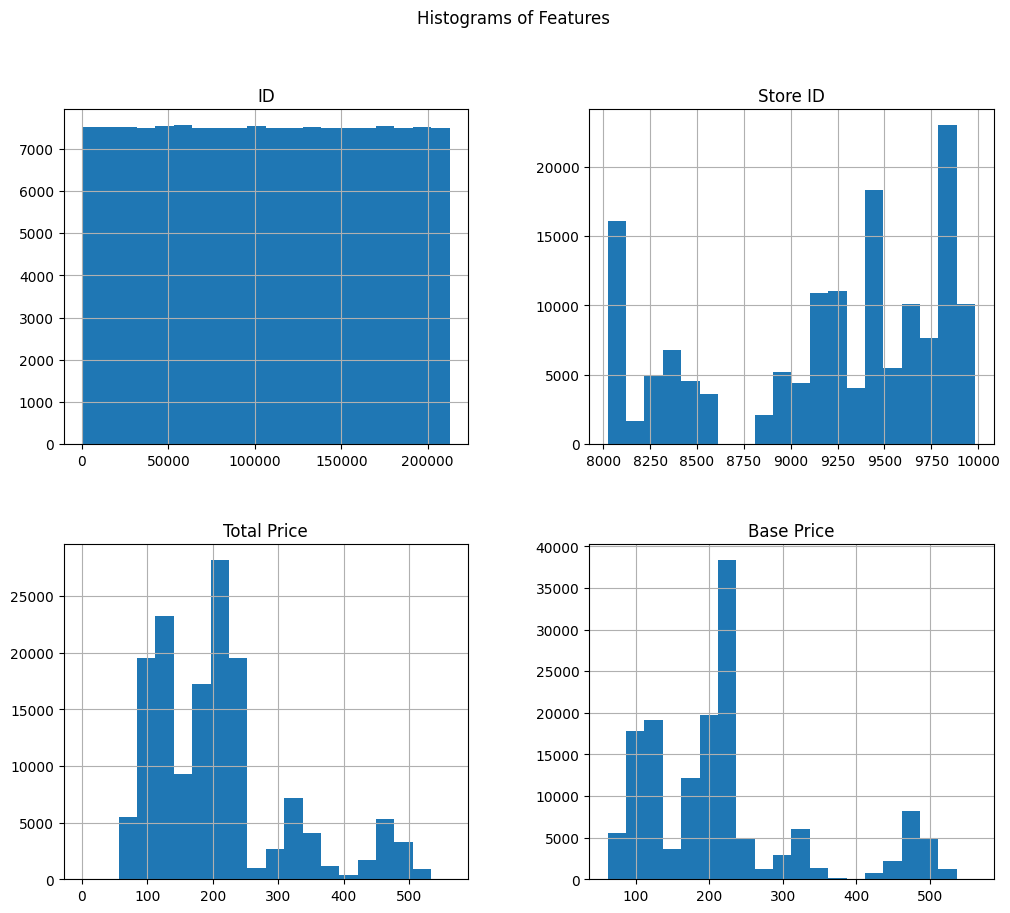

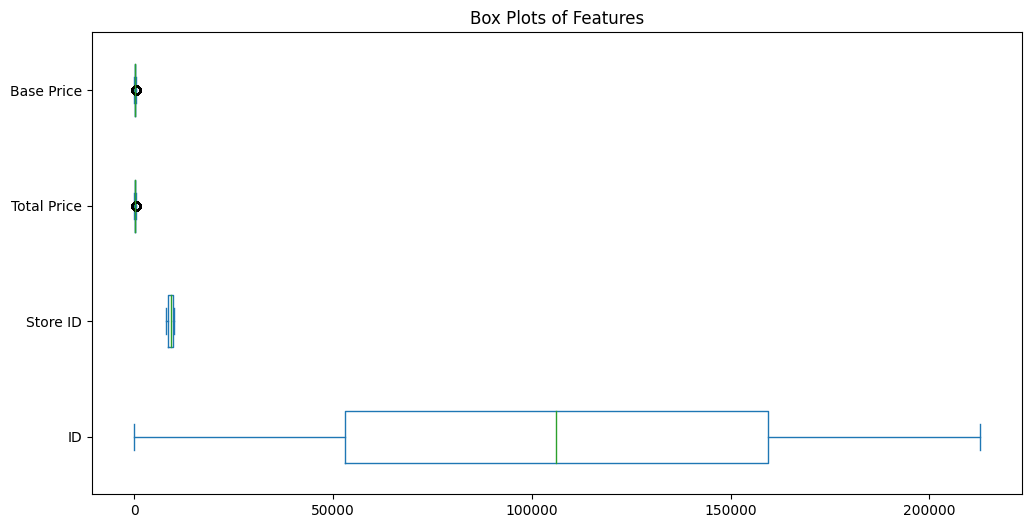

In [65]:
import matplotlib.pyplot as plt

# Histograms
data[features].hist(bins=20, figsize=(12, 10))
plt.suptitle("Histograms of Features")
plt.show()

# Box Plots
data[features].plot(kind='box', vert=False, figsize=(12, 6))
plt.title("Box Plots of Features")
plt.show()

Correlation Matrix:

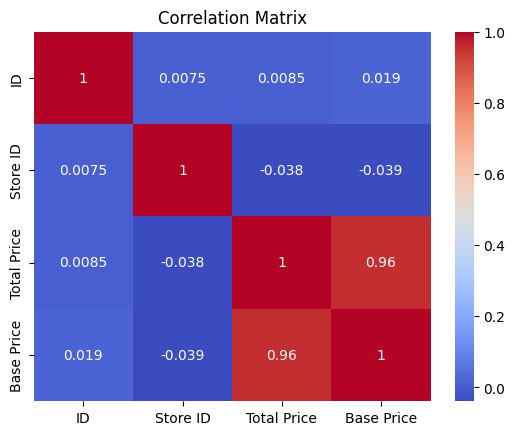

In [66]:
import seaborn as sns

correlation_matrix = data[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Pair Plot:

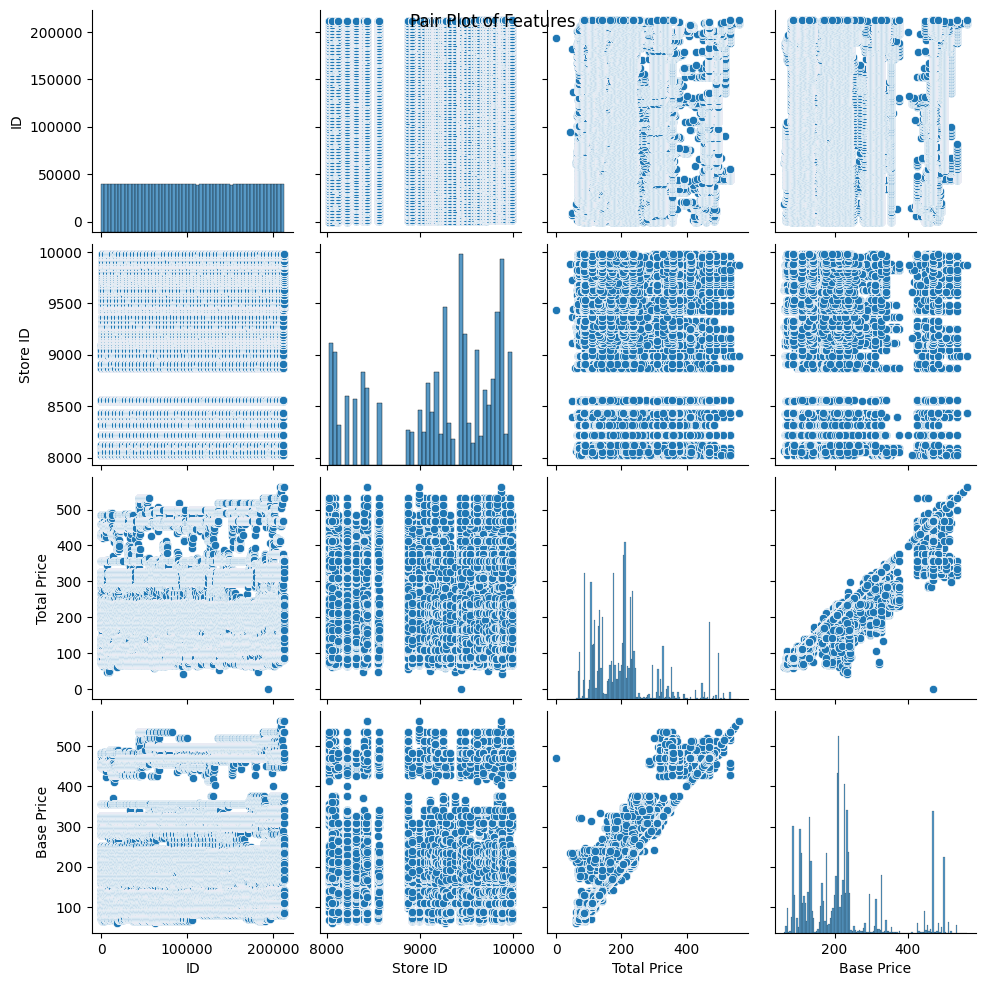

In [67]:
sns.pairplot(data[features])
plt.suptitle("Pair Plot of Features")
plt.show()

 Target Variable Distribution:

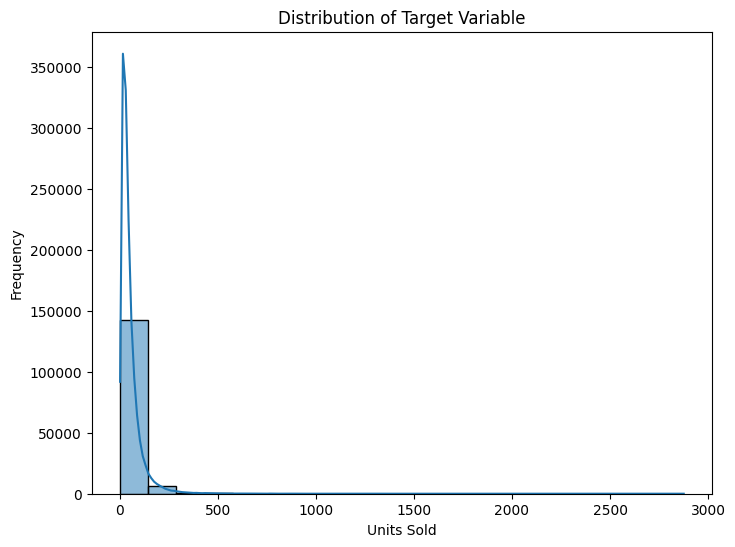

In [68]:
plt.figure(figsize=(8, 6))
sns.histplot(data[target], bins=20, kde=True)
plt.title("Distribution of Target Variable")
plt.xlabel(target)
plt.ylabel("Frequency")
plt.show()

 Feature vs. Target Plots:

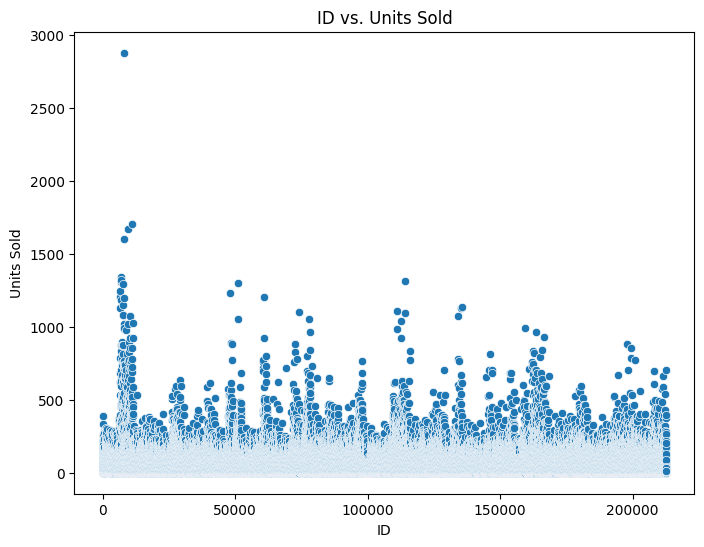

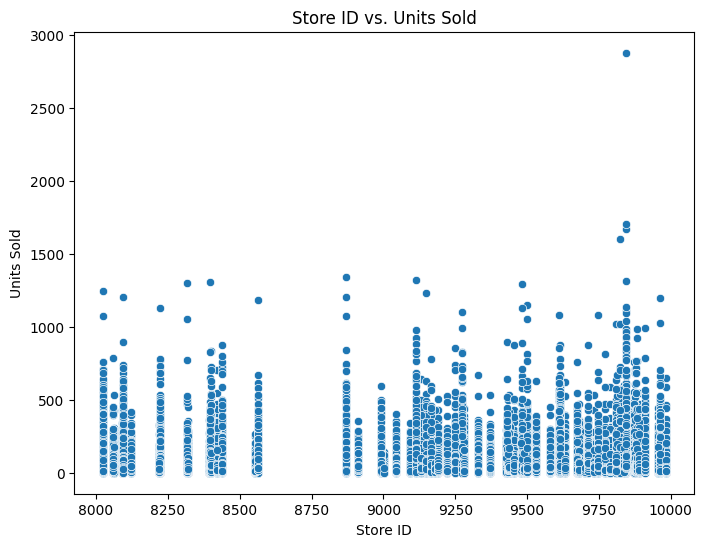

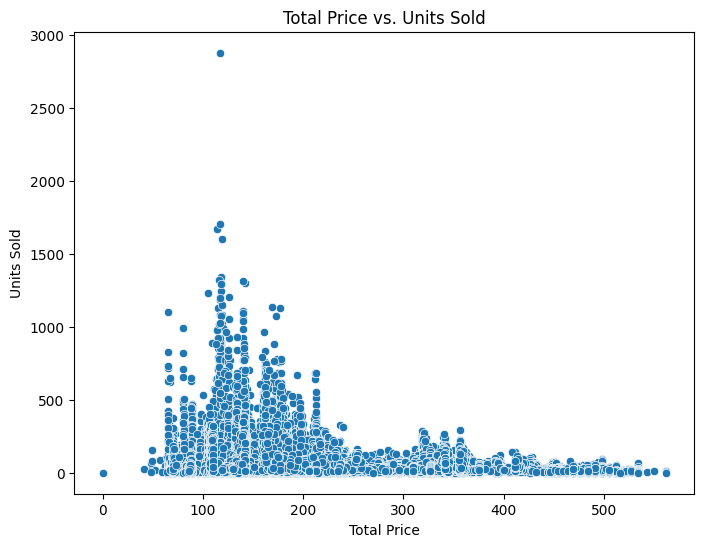

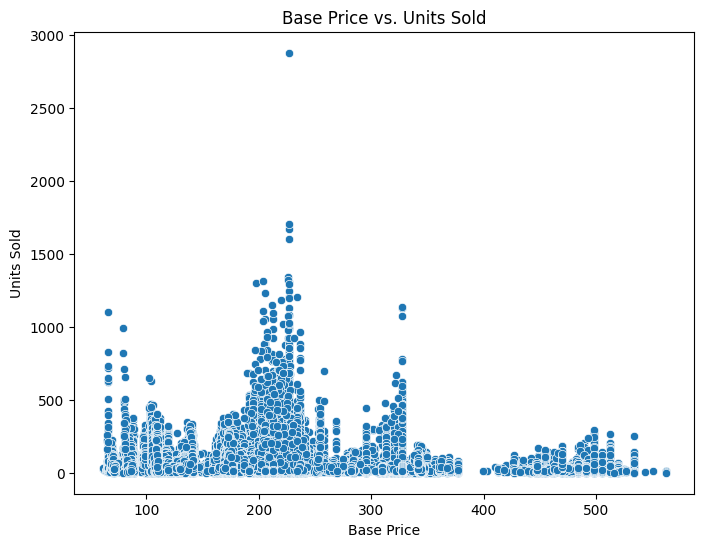

In [69]:
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[feature], y=data[target])
    plt.title(f"{feature} vs. {target}")
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

 Box Plot of Target Variable Grouped by Categorical Feature

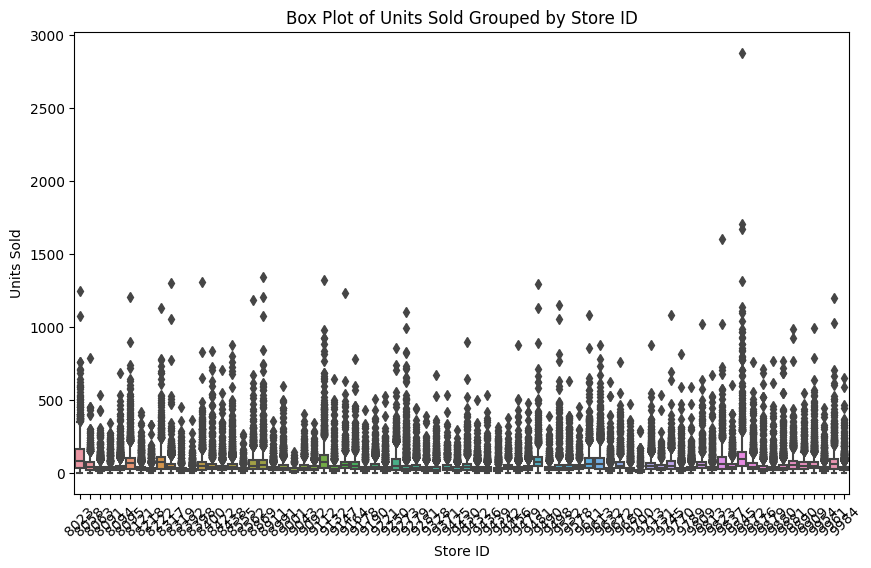

In [70]:
categorical_feature = 'Store ID'  # Example categorical feature
plt.figure(figsize=(10, 6))
sns.boxplot(x=categorical_feature, y=target, data=data)
plt.title(f"Box Plot of {target} Grouped by {categorical_feature}")
plt.xlabel(categorical_feature)
plt.ylabel(target)
plt.xticks(rotation=45)
plt.show()

MODEL SELECTION

In [15]:
# Import necessary libraries for different algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
linear_reg = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)
svm = SVR()
gradient_boosting = GradientBoostingRegressor(random_state=42)

# Train and predict using each algorithm
models = [linear_reg, random_forest, svm, gradient_boosting]
model_names = ['Linear Regression', 'Random Forest', 'Support Vector Machine', 'Gradient Boosting']
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("-" * 30)

Model: Linear Regression
Mean Squared Error: 2844.00
R-squared: 0.15
------------------------------
Model: Random Forest
Mean Squared Error: 1156.38
R-squared: 0.66
------------------------------
Model: Support Vector Machine
Mean Squared Error: 2956.17
R-squared: 0.12
------------------------------
Model: Gradient Boosting
Mean Squared Error: 1885.63
R-squared: 0.44
------------------------------


# **CONCLUSION**

Random Forest and Gradient Boosting model typically perform well in a variety of datasets due to their ability to capture complex patterns in the data.

Support Vector Machine (SVM) might perform well if the dataset has high dimensionality and complex relationships, although it might require fine-tuning of hyperparameters for optimal results.

Linear Regression provides a basic understanding of the relationships between variables but might not capture intricate patterns present in the data.